# 7.1 (gaussian integral)

In [2]:
using LinearAlgebra
using Plots
using Colors
using Statistics
using Polynomials
gr()

Plots.GRBackend()

### Integration using simple sampling


We need a function that generates random numbers in a range so using the method from the previous problem we have:

In [3]:
function randRanged(lowRange, upRange)
    y = lowRange + (upRange - lowRange) * rand()
    return y
end

randRanged (generic function with 1 method)

We test the new generator to ensure it works well.

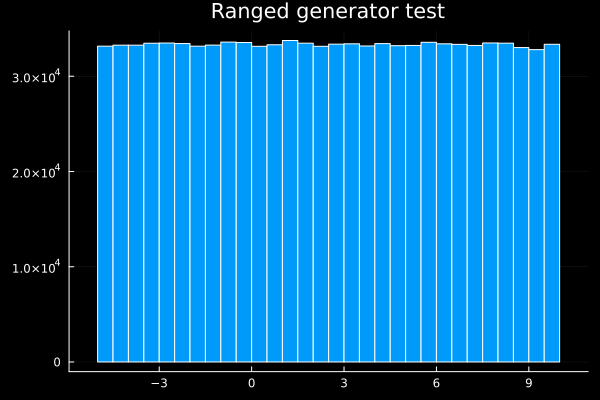

In [4]:
randcheck = []
for i in 1:1000000
    push!(randcheck, randRanged(-5, 10))
end
histogram(randcheck, background = :black, title = "Ranged generator test", legend = false, bins = 40)

Function that integrates using the simple sampling technique and the above parameters.

In [5]:
function simpleIntegrate(f, lowerBound, upperBound, intRes)
    fSamples = Float64[]
    for i in 1:intRes
        push!(fSamples, f(randRanged(lowerBound, upperBound)))
    end
    I = (upperBound - lowerBound) * mean(fSamples)
end

simpleIntegrate (generic function with 1 method)

We also need a function to calculate the inaccuracy of our integral.

In [6]:
function simpleIntegralInaccuracy(f, lowerBound, upperBound, intRes)
    fSamples = Float64[]
    f2Samples = Float64[]
    for i in 1:intRes
        push!(fSamples, f(randRanged(lowerBound, upperBound)))
        push!(f2Samples, f(randRanged(lowerBound, upperBound))^2)
    end
    delta = sqrt(mean(f2Samples) - mean(fSamples)^2) / sqrt(intRes)
    return delta
end

simpleIntegralInaccuracy (generic function with 1 method)

Integration Parameters and integration.

In [7]:
f(x) = exp(-x^2) #function that we want to integrate
lowerBound = 0 #lower boundary
upperBound = 2 #upper boundary
intRes = 100000000 #resolution of the integral (number of samples taken)

result = simpleIntegrate(f, lowerBound, upperBound, intRes)
delta = simpleIntegralInaccuracy(f, lowerBound, upperBound, intRes)

println("Integration Result = $result")
println("Integration Inaccuracy = $delta")

Integration Result = 0.8821355600167965
Integration Inaccuracy = 3.4466679001159394e-5


The results are as follows: (execution time was measured using the built in timer in jupyter and only the integration time was considered) <br>
the accurate value used is 0.8820813907 calculated using Integral-calculator.com <br>
| Sample count | Execution time (s) | Results | Delta   | Deviation from accurate value (%) |
|--------------|--------------------|---------|---------|-----------------------------------|
| 10000        | t < 0.0            | 0.885   | 0.001   | 0.3                               |
| 10000000     | 0.3                | 0.8819  | 0.0001  | 0.02                              |
| 100000000    | 3.5                | 0.88206 | 0.00003 | 0.002                             |



### Integration with smart sampling
First we need a random generator with the distribution: $g(x) = e^{-x}$ <br>
that means the transformation needed to generate this distribution from the built in generator is: <br>
$y = -ln(x)$

In [8]:
function exponentialRandomGenerator(lowerBound, upperBound)
    y = -log(randRanged(exp(-upperBound), exp(-lowerBound)))
    return y
end

exponentialRandomGenerator (generic function with 1 method)

We can also check this generator like before.

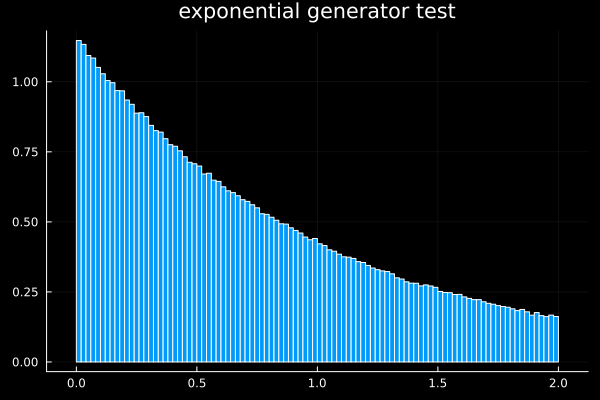

In [9]:
randcheck = []
for i in 1:1000000
    push!(randcheck, exponentialRandomGenerator(0, 2))
end
histogram(randcheck, background = :black, title = "exponential generator test", legend = false, bins = 100, normalize = :pdf)

Now that we know our generator works well, we can create the integrating function. (considering $\int^2_0 g(x) dx = 1 - e^{-2}$)

In [10]:
function smartIntegrate(f, lowerBound, upperBound, intRes)
    fSamples = Float64[]
    for i in 1:intRes
        num = exponentialRandomGenerator(lowerBound, upperBound)
        push!(fSamples, f(num) / exp(-num))
    end
    I = (1 - exp(-2)) * mean(fSamples)
end

smartIntegrate (generic function with 1 method)

To calculate the inaccuracy we can use the same function as before but this time it uses the new exponential generator.

In [11]:
function smartIntegralInaccuracy(f, lowerBound, upperBound, intRes)
    fSamples = Float64[]
    f2Samples = Float64[]
    for i in 1:intRes
        push!(fSamples, f(exponentialRandomGenerator(lowerBound, upperBound)))
        push!(f2Samples, f(exponentialRandomGenerator(lowerBound, upperBound))^2)
    end
    delta = sqrt(mean(f2Samples) - mean(fSamples)^2) / sqrt(intRes)
    return delta
end

smartIntegralInaccuracy (generic function with 1 method)

Now we can use the functions to calculate the Integral and it's inaccuracy using the smart sampling method.

In [12]:
f(x) = exp(-x^2) #function that we want to integrate
lowerBound = 0 #lower boundary
upperBound = 2 #upper boundary
intRes = 100000000 #resolution of the integral (number of samples taken)

result = smartIntegrate(f, lowerBound, upperBound, intRes)
delta = smartIntegralInaccuracy(f, lowerBound, upperBound, intRes)

println("Integration Result = $result")
println("Integration Inaccuracy = $delta")

Integration Result = 0.8820865919207462
Integration Inaccuracy = 3.305718649377316e-5


The results are as follows: (execution time was measured using the built in timer in jupyter and only the integration time was considered) <br>
the accurate value used is 0.8820813907 calculated using Integral-calculator.com <br>
| Sample count | Execution time (s) | Results | Delta   | Deviation from accurate value (%) |
|--------------|--------------------|---------|---------|-----------------------------------|
| 10000        | t < 0.0            | 0.879   | 0.003   | 0.3                               |
| 10000000     | 1.0                | 0.8820  | 0.0001  | 0.01                              |
| 100000000    | 9.7                | 0.88206 | 0.00003 | 0.002                             |

